# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque
from workspace_utils import active_session
import matplotlib.pyplot as plt
%matplotlib inline

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [5]:
# env_info = env.reset(train_mode=True)[brain_name] # reset the environment
# state = env_info.vector_observations[0]            # get the current state
# score = 0                                          # initialize the score
# while True:
#     action = np.random.randint(action_size)        # select an action
#     env_info = env.step(action)[brain_name]        # send the action to the environment
#     next_state = env_info.vector_observations[0]   # get the next state
#     reward = env_info.rewards[0]                   # get the reward
#     done = env_info.local_done[0]                  # see if episode has finished
#     score += reward                                # update the score
#     state = next_state                             # roll over the state to next time step
#     if done:                                       # exit loop if episode finished
#         break
    
# print("Score: {}".format(score))

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [6]:
with active_session():    
    # Initialize Agent Parameters
    from dqn_agent import Agent
    agent = Agent(state_size=state_size, action_size=action_size, seed=0)

    def dqn(n_episodes=1000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
        """Deep Q-Learning.

        Params
        ======
            n_episodes (int): maximum number of training episodes
            max_t (int): maximum number of timesteps per episode
            eps_start (float): starting value of epsilon, for epsilon-greedy action selection
            eps_end (float): minimum value of epsilon
            eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        """
        scores = []                        # list containing scores from each episode
        scores_window = deque(maxlen=100)  # last 100 scores
        eps = eps_start                    # initialize epsilon

        for i_episode in range(1, n_episodes+1):

            env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
            state = env_info.vector_observations[0]            # get the current state
            score = 0                                          # initialize the score

            for t in range(max_t):
                action = agent.act(state, eps)

                env_info = env.step(action)[brain_name]        # send the action to the environment
                next_state = env_info.vector_observations[0]   # get the next state
                reward = env_info.rewards[0]                   # get the reward
                done = env_info.local_done[0]                  # see if episode has finished

                agent.step(state, action, reward, next_state, done)
                state = next_state
                score += reward
                if done:
                    break 

            scores_window.append(score)       # save most recent score
            scores.append(score)              # save most recent score
            eps = max(eps_end, eps_decay*eps) # decrease epsilon

            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    #         if i_episode % 100 == 0:
    #             print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            if np.mean(scores_window)>=13.0:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
                torch.save(agent.qnetwork_local.state_dict(),'checkpoint.pth')
                break

        return scores

    scores = dqn()


Episode 1	Average Score: 0.00
Episode 2	Average Score: 0.00
Episode 3	Average Score: -0.33
Episode 4	Average Score: -0.50
Episode 5	Average Score: -0.60
Episode 6	Average Score: -0.83
Episode 7	Average Score: -0.57
Episode 8	Average Score: -0.50
Episode 9	Average Score: -0.44
Episode 10	Average Score: -0.30
Episode 11	Average Score: -0.45
Episode 12	Average Score: -0.42
Episode 13	Average Score: -0.08
Episode 14	Average Score: -0.07
Episode 15	Average Score: -0.07
Episode 16	Average Score: -0.06
Episode 17	Average Score: 0.00
Episode 18	Average Score: 0.06
Episode 19	Average Score: 0.11
Episode 20	Average Score: 0.30
Episode 21	Average Score: 0.29
Episode 22	Average Score: 0.27
Episode 23	Average Score: 0.26
Episode 24	Average Score: 0.21
Episode 25	Average Score: 0.24
Episode 26	Average Score: 0.27
Episode 27	Average Score: 0.19
Episode 28	Average Score: 0.18
Episode 29	Average Score: 0.24
Episode 30	Average Score: 0.33
Episode 31	Average Score: 0.32
Episode 32	Average Score: 0.31
Epi

Episode 260	Average Score: 7.13
Episode 261	Average Score: 7.18
Episode 262	Average Score: 7.20
Episode 263	Average Score: 7.29
Episode 264	Average Score: 7.35
Episode 265	Average Score: 7.42
Episode 266	Average Score: 7.44
Episode 267	Average Score: 7.48
Episode 268	Average Score: 7.56
Episode 269	Average Score: 7.55
Episode 270	Average Score: 7.56
Episode 271	Average Score: 7.57
Episode 272	Average Score: 7.62
Episode 273	Average Score: 7.68
Episode 274	Average Score: 7.68
Episode 275	Average Score: 7.70
Episode 276	Average Score: 7.72
Episode 277	Average Score: 7.72
Episode 278	Average Score: 7.76
Episode 279	Average Score: 7.77
Episode 280	Average Score: 7.83
Episode 281	Average Score: 7.79
Episode 282	Average Score: 7.80
Episode 283	Average Score: 7.78
Episode 284	Average Score: 7.71
Episode 285	Average Score: 7.76
Episode 286	Average Score: 7.84
Episode 287	Average Score: 7.85
Episode 288	Average Score: 7.86
Episode 289	Average Score: 7.89
Episode 290	Average Score: 7.99
Episode 

Episode 513	Average Score: 12.15
Episode 514	Average Score: 12.14
Episode 515	Average Score: 12.14
Episode 516	Average Score: 12.14
Episode 517	Average Score: 12.28
Episode 518	Average Score: 12.30
Episode 519	Average Score: 12.30
Episode 520	Average Score: 12.30
Episode 521	Average Score: 12.36
Episode 522	Average Score: 12.20
Episode 523	Average Score: 12.26
Episode 524	Average Score: 12.20
Episode 525	Average Score: 12.24
Episode 526	Average Score: 12.25
Episode 527	Average Score: 12.29
Episode 528	Average Score: 12.29
Episode 529	Average Score: 12.26
Episode 530	Average Score: 12.26
Episode 531	Average Score: 12.27
Episode 532	Average Score: 12.31
Episode 533	Average Score: 12.40
Episode 534	Average Score: 12.50
Episode 535	Average Score: 12.56
Episode 536	Average Score: 12.53
Episode 537	Average Score: 12.62
Episode 538	Average Score: 12.69
Episode 539	Average Score: 12.67
Episode 540	Average Score: 12.67
Episode 541	Average Score: 12.57
Episode 542	Average Score: 12.58
Episode 54

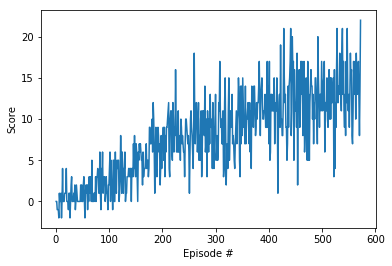

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
# load the weights from file
from ddpg_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, random_seed=0)
eps = 1.0

agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth', map_location='cpu'))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                      # initialize the score

while True:
    action = agent.act(state, eps)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations      # get the next state
    reward = env_info.rewards                      # get the reward
    done = env_info.local_done                     # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step                                  
                                     
    if done:
        break

Close the environment when finished with training and assessing agent's performance.

In [ ]:
env.close()